In [107]:
import numpy as mp
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# > DATA LOADING AND EXPLORATION 

In [108]:
df_bookings=pd.read_csv('datasets/fact_bookings.csv')
df_date = pd.read_csv('datasets/dim_date.csv')
df_hotels =pd.read_csv('datasets/dim_hotels.csv')
df_rooms=pd.read_csv('datasets/dim_rooms.csv')
df_agg_bookings =pd.read_csv('datasets/fact_aggregated_bookings.csv')

In [109]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [110]:
df_bookings.shape

(134590, 12)

In [111]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [112]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [113]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [114]:
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

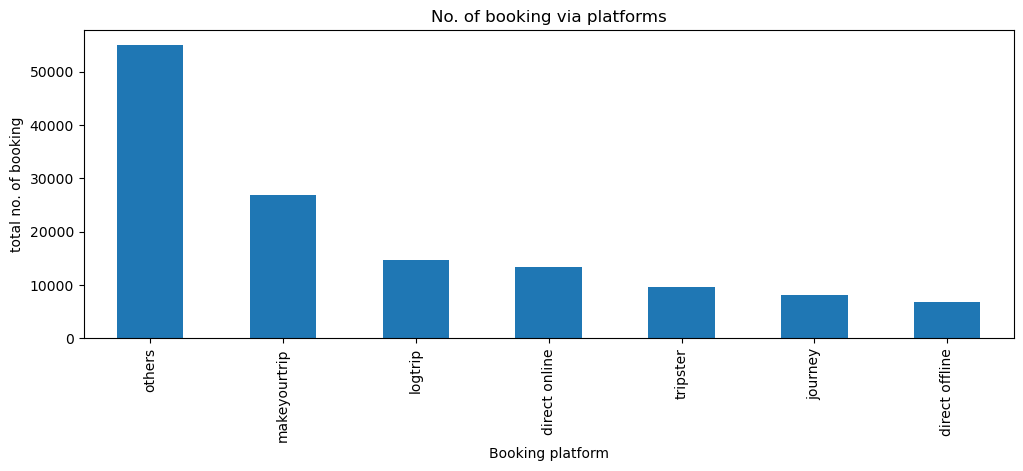

In [115]:
plt.figure(figsize=(12,4))
df_bookings.booking_platform.value_counts().plot(kind='bar')
plt.title('No. of booking via platforms')
plt.ylabel('total no. of booking')
plt.xlabel('Booking platform')

plt.show()

In [116]:
df_hotels.shape

(25, 4)

In [117]:
df_hotels.columns

Index(['property_id', 'property_name', 'category', 'city'], dtype='object')

In [118]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [119]:
df_hotels.property_name.value_counts()

property_name
Atliq Grands     4
Atliq Exotica    4
Atliq City       4
Atliq Blu        4
Atliq Bay        4
Atliq Palace     4
Atliq Seasons    1
Name: count, dtype: int64

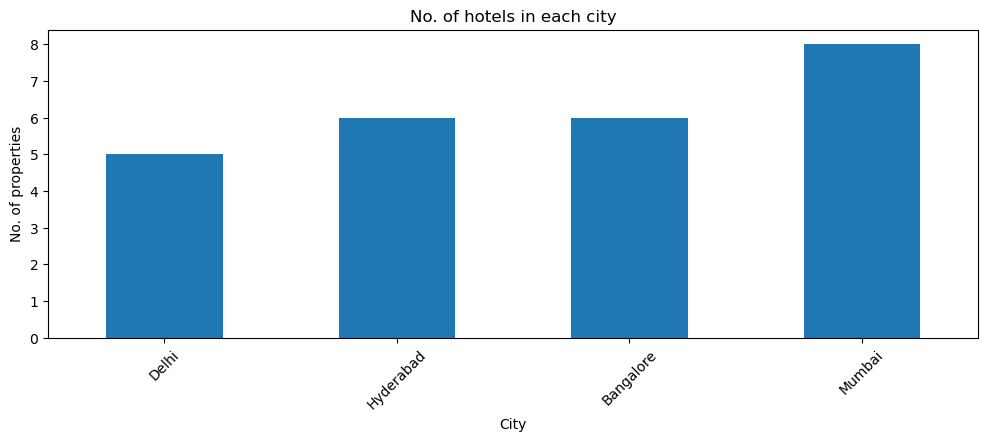

In [120]:

plt.figure(figsize=(12,4))
df_hotels.city.value_counts().sort_values().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('No. of hotels in each city')
plt.ylabel('No. of properties')
plt.xlabel('City')

plt.show()

In [121]:
df_agg_bookings.shape

(9200, 5)

In [122]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [123]:
df_agg_bookings.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity'],
      dtype='object')

In [124]:
df_agg_bookings.room_category.value_counts()

room_category
RT1    2300
RT2    2300
RT3    2300
RT4    2300
Name: count, dtype: int64

In [125]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

In [126]:
df_agg_bookings.groupby('property_id')['successful_bookings'].agg('sum')

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [127]:
df_agg_bookings[(df_agg_bookings.successful_bookings>df_agg_bookings.capacity)]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [128]:
df_agg_bookings[df_agg_bookings.capacity==df_agg_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


# > DATA CLEANING

In [129]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [130]:
#taking only +ve guests value only
df_bookings=df_bookings[df_bookings.no_guests>0]

In [131]:
df_bookings.shape

(134578, 12)

In [132]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134578.000000,134578.000000,56679.000000,1.345780e+05,134578.000000
mean,18061.143315,2.036744,3.619048,1.537804e+04,12696.011822
std,1093.053454,1.031710,1.234970,9.304015e+04,6927.841641
min,16558.000000,1.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [133]:
#Issues with the revenue genereted having outliers
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(6500, 28560000)

In [134]:
#Using std method to remove outliers (higher limit of val = mean+3*std and lower limit= avg-3*std)
mean_val,std_val=df_bookings.revenue_generated.mean(),df_bookings.revenue_generated.std()

In [135]:
higher_limit = mean_val +3*std_val
#revenue can't be negative
lower_limit =0

In [136]:
higher_limit,lower_limit

(np.float64(294498.50173198653), 0)

In [137]:
#outliers
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [138]:
#removing outliers
df_bookings=df_bookings[df_bookings.revenue_generated<higher_limit]

In [139]:
df_bookings.shape

(134573, 12)

In [140]:
#checking outliers on revenue_realized
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [141]:
mean_realized_val,std_realized_val = df_bookings.revenue_realized.mean(),df_bookings.revenue_realized.std()

In [142]:
high_point=mean_realized_val+3*std_realized_val

In [143]:
#we have value greater than high point but if we think logically max value is 45220 which is possible in current world now lets check which are value with more amount than 3std
df_bookings[df_bookings.revenue_realized>high_point]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [144]:
#we see that mostly room type is rt4 which is presindential suite so they could be expensive so now we will work on 3std method on rt4 room category
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [145]:
df_bookings[df_bookings.room_category=='RT4'].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [146]:
mean_rt4=df_bookings[df_bookings.room_category=='RT4'].revenue_realized.mean()
std_rt4=df_bookings[df_bookings.room_category=='RT4'].revenue_realized.std()

In [147]:
hight_point_rt4=mean_rt4+3*std_rt4
hight_point_rt4

#our max val is less than upper limit of the room category so that is possible 

np.float64(50585.1056709996)

In [148]:
df_bookings.isnull().sum()

#we have 77897 na val for rating and that is possible as people don't give ratings sometime so no change required

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [149]:
df_agg_bookings.describe()

,property_id,successful_bookings,capacity
count,9200.000000,9200.000000,9198.000000
mean,18040.640000,14.655761,25.280496
std,1099.818325,7.736170,11.442080
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,123.000000,50.000000


In [150]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [151]:
df_agg_bookings[df_agg_bookings.capacity.isnull()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [152]:
capacity_median=df_agg_bookings.capacity.median()

In [153]:
#filling the na value in fact_agg_booking data
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace=True)

C:\Users\91901\AppData\Local\Temp\ipykernel_14520\2902908610.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace=True)


In [154]:
df_agg_bookings.loc[[8,15]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
15,17563,1-May-22,RT1,21,25.0


In [155]:
#cheking the value having more bookings then capacity
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [156]:
#filtering such data out
df_agg_bookings=df_agg_bookings[df_agg_bookings.successful_bookings<=df_agg_bookings.capacity]

In [157]:
df_agg_bookings.shape

(9194, 5)

# > DATA TRNASFORMATION

In [158]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0


In [159]:
df_agg_bookings['Occ_pct'] = round((df_agg_bookings['successful_bookings']/df_agg_bookings['capacity'])*100,2)

In [160]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22
9196,16559,31-Jul-22,RT4,13,18.0,72.22
9197,17558,31-Jul-22,RT4,3,6.0,50.00
9198,19563,31-Jul-22,RT4,3,6.0,50.00


# >AD-HOC ANALYSIS

<b> 1. What is an average occupancy rate in each of the room categories? </b>

In [161]:
df=pd.merge(df_agg_bookings,df_rooms,left_on='room_category',right_on='room_id')
df.drop('room_id',axis=1,inplace=True)

In [162]:
df.groupby('room_class')['Occ_pct'].mean().round(2)

room_class
Elite           58.01
Premium         58.03
Presidential    59.28
Standard        57.89
Name: Occ_pct, dtype: float64

<b> 2. Print Average Occupanct rate per ciy? </b>


In [163]:
df = pd.merge(df,df_hotels,on='property_id')
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore
3,16558,1-May-22,RT1,18,19.0,94.74,Standard,Atliq Grands,Luxury,Delhi
4,17560,1-May-22,RT1,28,40.0,70.00,Standard,Atliq City,Business,Mumbai


<Axes: xlabel='city'>

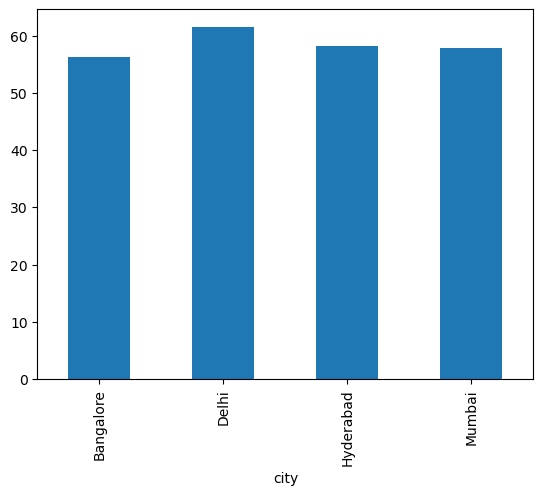

In [165]:
df.groupby('city')['Occ_pct'].mean().plot(kind='bar')

<b> 3. When was the Occupancy Better Weekdays or Weekends?</b>

In [167]:
df=pd.merge(df,df_date,left_on='check_in_date',right_on='date')
df.drop('date',axis=1,inplace=True)

In [168]:
df

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_pct,room_class,property_name,category,city,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,Premium,Atliq Palace,Business,Bangalore,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,Standard,Atliq City,Business,Hyderabad,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,53.33,Standard,Atliq Palace,Business,Bangalore,May 22,W 20,weekeday
4,17558,10-May-22,RT1,11,19.0,57.89,Standard,Atliq Grands,Luxury,Mumbai,May 22,W 20,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,16563,31-Jul-22,RT4,13,18.0,72.22,Presidential,Atliq Palace,Business,Delhi,Jul 22,W 32,weekend
6493,16559,31-Jul-22,RT4,13,18.0,72.22,Presidential,Atliq Exotica,Luxury,Mumbai,Jul 22,W 32,weekend
6494,17558,31-Jul-22,RT4,3,6.0,50.00,Presidential,Atliq Grands,Luxury,Mumbai,Jul 22,W 32,weekend
6495,19563,31-Jul-22,RT4,3,6.0,50.00,Presidential,Atliq Palace,Business,Bangalore,Jul 22,W 32,weekend


In [169]:
df.groupby('day_type')['Occ_pct'].mean().round(2)

day_type
weekeday    50.88
weekend     72.34
Name: Occ_pct, dtype: float64

<b> 4. In the month of June what is the occupancy for different cities? </b>

In [172]:
df[df['mmm yy']=='Jun 22'].groupby('city')['Occ_pct'].mean().round(2).sort_values(ascending=False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.44
Name: Occ_pct, dtype: float64

<b>5. Adding On New data of Aug month</b>

In [174]:
df_aug=pd.read_csv('datasets/new_data_august.csv')

In [175]:
df_aug.head()

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92


In [180]:
df_aug=df_aug.rename(columns={'occ%':'Occ_pct'})

In [181]:
df_aug

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,Occ_pct
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92
5,17561,Atliq Blu,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,18,26,69.23
6,17564,Atliq Seasons,Business,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,10,16,62.50


In [183]:
latest_df=pd.concat([df,df_aug],ignore_index=True,axis=0)

In [184]:
latest_df.tail(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_pct,room_class,property_name,category,city,mmm yy,week no,day_type
6494,17558,31-Jul-22,RT4,3,6.0,50.00,Presidential,Atliq Grands,Luxury,Mumbai,Jul 22,W 32,weekend
6495,19563,31-Jul-22,RT4,3,6.0,50.00,Presidential,Atliq Palace,Business,Bangalore,Jul 22,W 32,weekend
6496,17561,31-Jul-22,RT4,3,4.0,75.00,Presidential,Atliq Blu,Luxury,Mumbai,Jul 22,W 32,weekend
6497,16559,01-Aug-22,RT1,30,30.0,100.00,Standard,Atliq Exotica,Luxury,Mumbai,Aug-22,W 32,weekeday
6498,19562,01-Aug-22,RT1,21,30.0,70.00,Standard,Atliq Bay,Luxury,Bangalore,Aug-22,W 32,weekeday
6499,19563,01-Aug-22,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore,Aug-22,W 32,weekeday
6500,19558,01-Aug-22,RT1,30,40.0,75.00,Standard,Atliq Grands,Luxury,Bangalore,Aug-22,W 32,weekeday
6501,19560,01-Aug-22,RT1,20,26.0,76.92,Standard,Atliq City,Business,Bangalore,Aug-22,W 32,weekeday
6502,17561,01-Aug-22,RT1,18,26.0,69.23,Standard,Atliq Blu,Luxury,Mumbai,Aug-22,W 32,weekeday
6503,17564,01-Aug-22,RT1,10,16.0,62.50,Standard,Atliq Seasons,Business,Mumbai,Aug-22,W 32,weekeday


In [185]:
latest_df.shape

(6504, 13)

<b>6. Print Reveneue realized per city</b>

In [187]:
df_bookings_all=pd.merge(df_bookings,df_hotels,on='property_id')

In [188]:
df_bookings_all.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [189]:
df_bookings_all.groupby('city')['revenue_realized'].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

<b>7. Print Month by Month Revenue</b>

In [190]:
df_date['date'] =pd.to_datetime(df_date['date'])

C:\Users\91901\AppData\Local\Temp\ipykernel_14520\564771793.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date['date'] =pd.to_datetime(df_date['date'])


In [197]:
df_bookings_all['check_in_date'] = pd.to_datetime(
    df_bookings_all['check_in_date'],
    dayfirst=True,   # since your example uses day first
    format="mixed",  # tells pandas to infer format row by row
    errors="coerce"  # invalid entries become NaT instead of crashing
)

In [201]:
df_bookings_all=pd.merge(df_bookings_all,df_date,left_on='check_in_date',right_on='date')

In [202]:
df_bookings_all.groupby('mmm yy')['revenue_realized'].sum()

mmm yy
Jul 22    572843348
Jun 22    553925855
May 22    581767396
Name: revenue_realized, dtype: int64

<b> 8. Print Revenue Realized per hotel type </b>

In [222]:
df_bookings_all.groupby(['property_name','category'])['revenue_realized'].sum()

property_name  category
Atliq Bay      Luxury      259996918
Atliq Blu      Luxury      260851922
Atliq City     Business    285798439
Atliq Exotica  Luxury      320258588
Atliq Grands   Luxury      211462134
Atliq Palace   Business    304081863
Atliq Seasons  Business     66086735
Name: revenue_realized, dtype: int64

<b> 9.Print average rating per city </b>

In [205]:
df_bookings_all.groupby('city')['ratings_given'].mean().round(2)

city
Bangalore    3.41
Delhi        3.78
Hyderabad    3.66
Mumbai       3.65
Name: ratings_given, dtype: float64

<b>10. Pie chart of revenue realized per booking platform</b>

In [216]:
total_revenue_platform=df_bookings_all.groupby('booking_platform')['revenue_realized'].sum()

In [218]:
booking_platform =total_revenue_platform.index

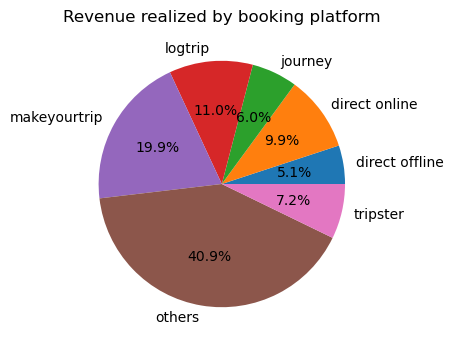

In [ ]:

plt.figure(figsize=(12,4))
plt.pie(total_revenue_platform,labels=booking_platform,autopct='%1.1f%%')
plt.title('Revenue realized by booking platform')
plt.show()

##df_bookings_all.groupby('booking_platform')['revenue_realized'].sum().plot(kind='pie',autopct='%1.1f%%')